In [1]:
!wget https://www.kaggle.com/api/v1/datasets/download/nikitarom/planets-dataset -O planets-dataset.zip

!unzip /content/planets-dataset.zip -d /content/planets-dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/planets-dataset/test-jpg-additional/test-jpg-additional/file_5499.jpg  
  inflating: /content/planets-dataset/test-jpg-additional/test-jpg-additional/file_55.jpg  
  inflating: /content/planets-dataset/test-jpg-additional/test-jpg-additional/file_550.jpg  
  inflating: /content/planets-dataset/test-jpg-additional/test-jpg-additional/file_5500.jpg  
  inflating: /content/planets-dataset/test-jpg-additional/test-jpg-additional/file_5501.jpg  
  inflating: /content/planets-dataset/test-jpg-additional/test-jpg-additional/file_5502.jpg  
  inflating: /content/planets-dataset/test-jpg-additional/test-jpg-additional/file_5503.jpg  
  inflating: /content/planets-dataset/test-jpg-additional/test-jpg-additional/file_5504.jpg  
  inflating: /content/planets-dataset/test-jpg-additional/test-jpg-additional/file_5505.jpg  
  inflating: /content/planets-dataset/test-jpg-additional/test-jpg-additional/file_5506.jpg  
  inflating:

### ***visualize Raw Data***

--- Starting Visualization After Dataset Download ---
Visualizing raw dataset tag distribution and multiple sample images...
Found 40479 images in /content/planets-dataset/planet/planet/train-jpg
Loaded 40479 rows from /content/planets-dataset/planet/planet/train_classes.csv
Tag distribution: tags
primary        37513
clear          28431
agriculture    12315
road            8071
water           7411
Name: count, dtype: int64


/tmp/ipython-input-28-1699019450.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_tags.values, y=all_tags.index, palette='viridis')


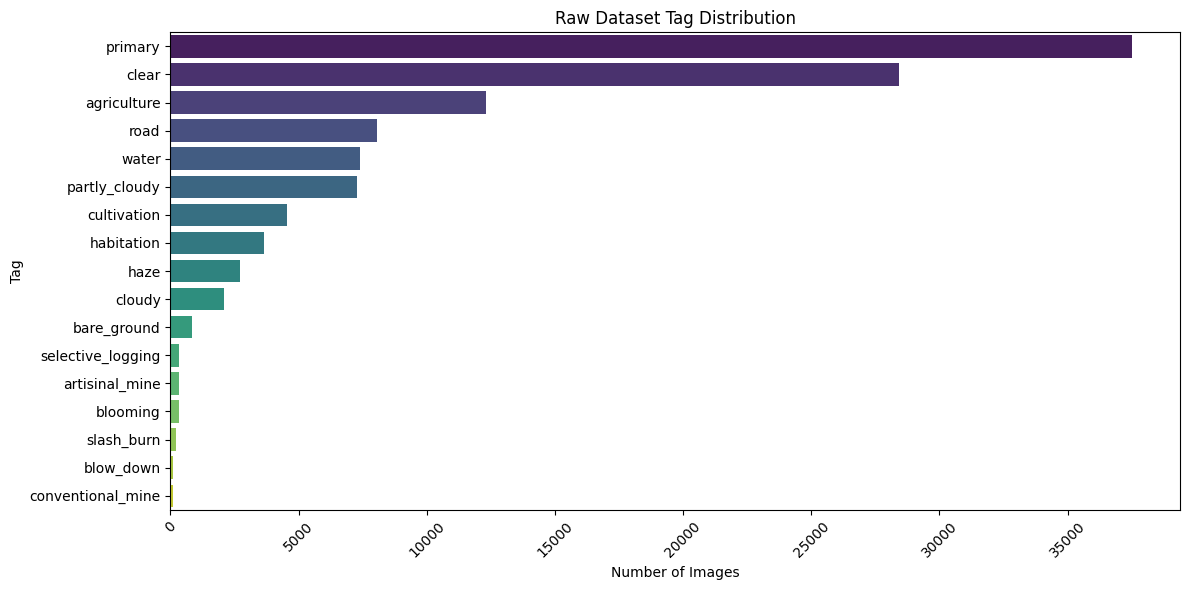

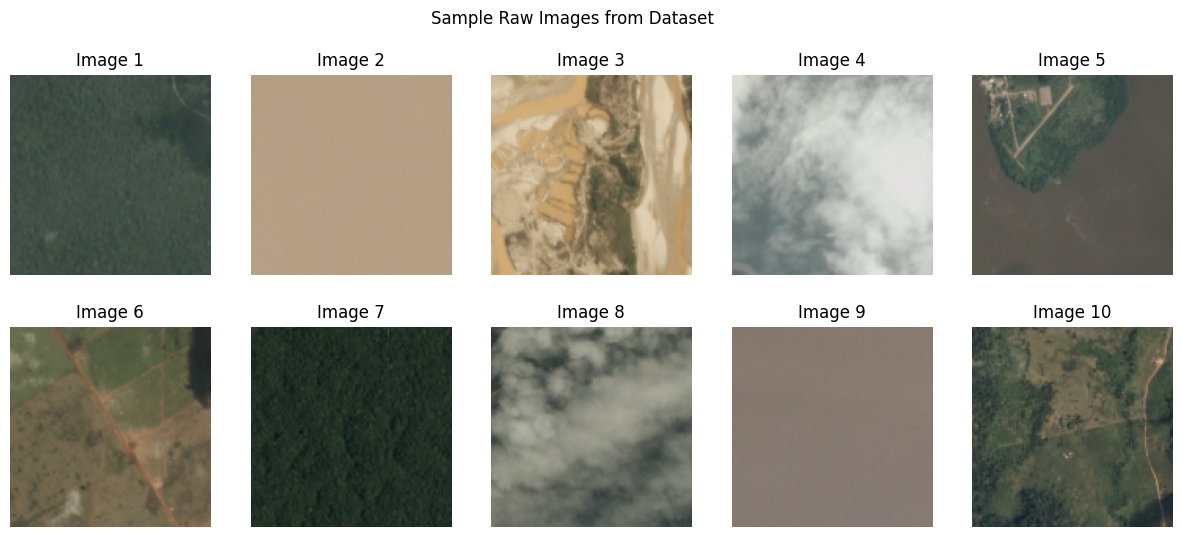

--- Visualization After Dataset Download Complete ---


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.preprocessing import image

print("--- Starting Visualization After Dataset Download ---")
print("Visualizing raw dataset tag distribution and multiple sample images...")

# Define paths
csv_path = '/content/planets-dataset/planet/planet/train_classes.csv'
img_dir = '/content/planets-dataset/planet/planet/train-jpg'
output_dir = '/content/project/results'
os.makedirs(output_dir, exist_ok=True)

# Check if files exist
if not os.path.exists(csv_path):
    print(f"Error: CSV file not found at {csv_path}. Please ensure dataset is downloaded.")
if not os.path.exists(img_dir):
    print(f"Error: Image directory not found at {img_dir}. Please check dataset extraction.")
else:
    print(f"Found {len(os.listdir(img_dir))} images in {img_dir}")

# Load raw dataset
try:
    raw_data = pd.read_csv(csv_path)
    print(f"Loaded {len(raw_data)} rows from {csv_path}")
except FileNotFoundError:
    print(f"Error: Could not load {csv_path}. Please verify the path and dataset.")
    raise
except Exception as e:
    print(f"Error loading CSV: {e}")
    raise

# Tag distribution
all_tags = raw_data['tags'].str.split().explode().value_counts()
print("Tag distribution:", all_tags.head())
plt.figure(figsize=(12, 6))
sns.barplot(x=all_tags.values, y=all_tags.index, palette='viridis')
plt.title('Raw Dataset Tag Distribution')
plt.xlabel('Number of Images')
plt.ylabel('Tag')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'raw_tag_distribution.png'), dpi=150)
plt.show()
plt.close()

# Multiple sample images
if not raw_data.empty:
    sample_images = raw_data.sample(n=10, random_state=42)['image_name'].values  # 10 random images
    plt.figure(figsize=(15, 6))
    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(img_dir, img_name + '.jpg')
        if os.path.exists(img_path):
            img = image.load_img(img_path, target_size=(128, 128))
            plt.subplot(2, 5, i+1)
            plt.imshow(img)
            plt.title(f"Image {i+1}")
            plt.axis('off')
        else:
            print(f"Warning: Image {img_path} not found, skipping.")
    plt.suptitle('Sample Raw Images from Dataset')
    plt.savefig(os.path.join(output_dir, 'sample_raw_images.png'), dpi=150)
    plt.show()
    plt.close()
else:
    print("Error: No data available to select sample images.")

print("--- Visualization After Dataset Download Complete ---")

In [2]:
!ls /content/planets-dataset/planet/planet/train-jpg | wc -l  # Should show ~40479
!cat /content/planets-dataset/planet/planet/train_classes.csv | head -n 3

40479
image_name,tags
train_0,haze primary
train_1,agriculture clear primary water


In [ ]:
!pip install tensorflow pandas numpy scikit-learn matplotlib seaborn

In [3]:
!mkdir -p /content/project/{dataset,models,results,temp}

In [5]:
# cell1 (about downloading dataset and installing external libraries)
# cell 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def analyze_dataset(csv_path, output_dir):
    """
    Analyzes the dataset and saves class distribution visualization.

    Args:
        csv_path (str): Path to train_classes.csv
        output_dir: Directory to save plots

    Returns:
        pd.DataFrame: Dataset with simplified labels
    """
    try:
        data = pd.read_csv(csv_path)

        def simplify_label(tags):
            """
            Maps tags to one of 7 classes, prioritizing rarer tags.

            Args:
                tags (str): Space-separated tags

            Returns:
                str: Single class label or None
            """
            tags = tags.lower().split()
            # Priority order: rarer to more common
            priority_classes = ['cloudy', 'haze', 'habitation', 'road', 'water', 'agriculture', 'primary']
            for cls in priority_classes:
                if cls in tags:
                    return cls
            return None

        data['label'] = data['tags'].apply(simplify_label)
        data = data[data['label'].notnull()].copy()

        # Class distribution
        class_counts = data['label'].value_counts()
        print("Class distribution:\n", class_counts)

        if any(class_counts < 2000):
            print("Warning: Some classes have <2000 images. Adjust n_per_class or change classes.")

        # Visualization
        os.makedirs(output_dir, exist_ok=True)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=class_counts.values, y=class_counts.index, hue=class_counts.index, palette='viridis', legend=False)
        plt.title('Class Distribution in Planet Dataset')
        plt.xlabel('Number of Images')
        plt.ylabel('Class')
        plt.savefig(os.path.join(output_dir, 'dataset_analysis.png'), dpi=150)
        plt.close()

        return data
    except FileNotFoundError:
        print(f"Error: {csv_path} not found.")
        raise
    except Exception as e:
        print(f"Error during dataset analysis: {e}")
        raise

--- Starting Visualization After Label Simplification ---
Visualizing class distribution after simplifying labels and sample images...
Class distribution:
 label
primary        18553
road            4972
water           4471
agriculture     4088
habitation      3531
haze            2697
cloudy          2089
Name: count, dtype: int64


/tmp/ipython-input-29-1455463943.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.values, y=class_counts.index, palette='viridis', legend=False)
/tmp/ipython-input-29-1455463943.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_tags.head(7).values, y=all_tags.head(7).index, palette='gray')


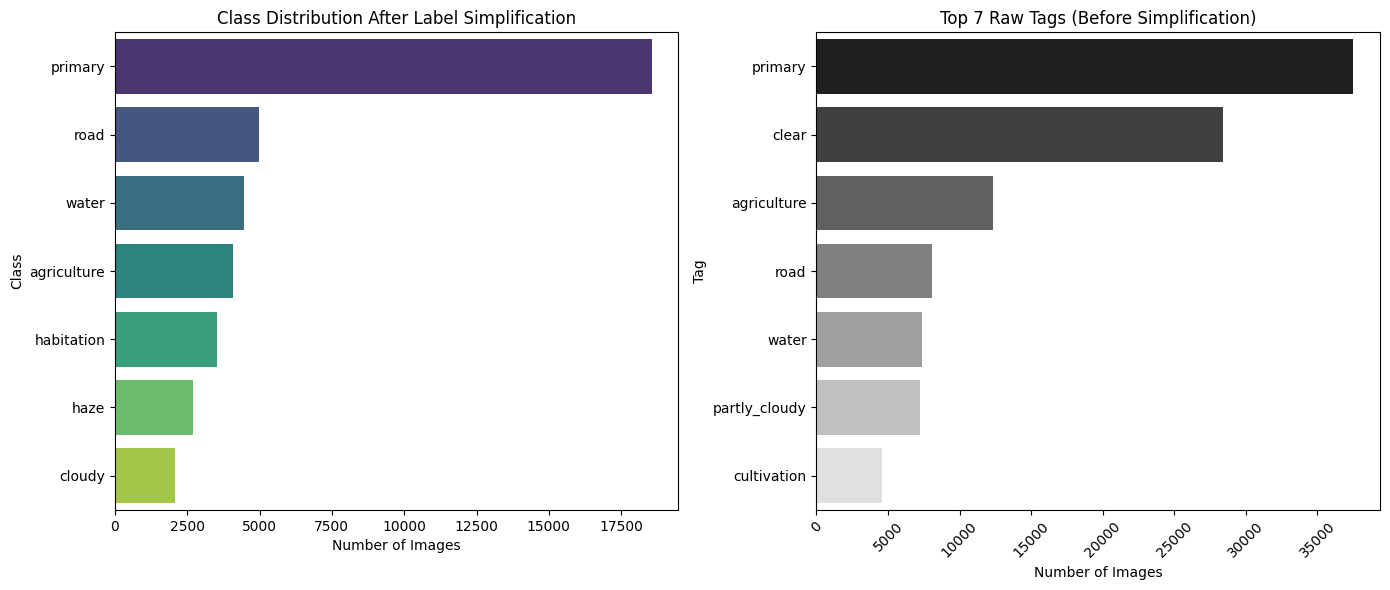

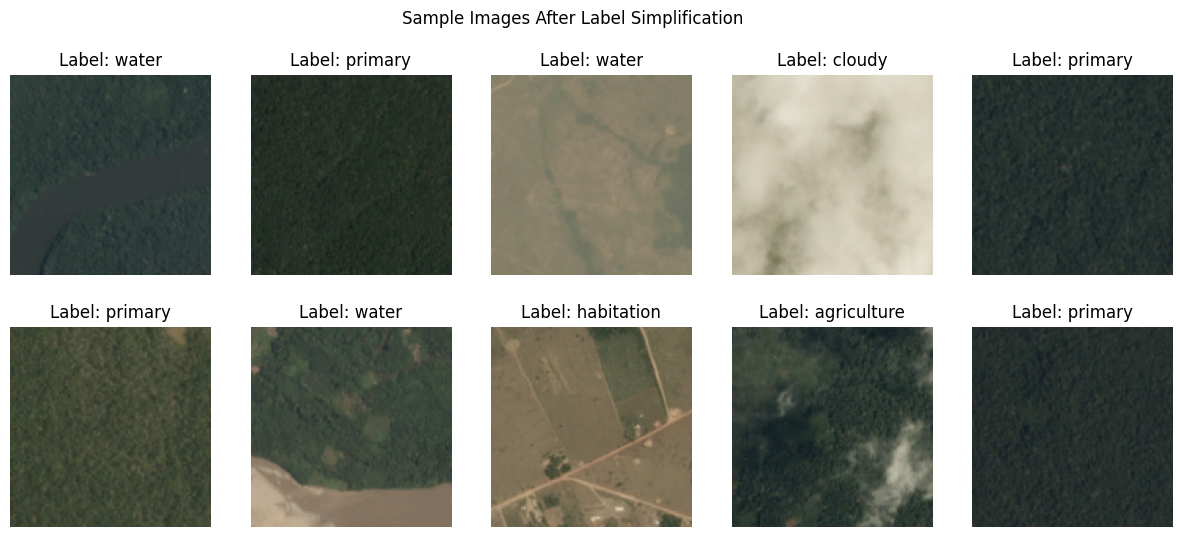

Class distribution and sample images after simplification visualized and saved.
--- Visualization After Label Simplification Complete ---


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.preprocessing import image

print("--- Starting Visualization After Label Simplification ---")
print("Visualizing class distribution after simplifying labels and sample images...")

# Define output_dir
output_dir = '/content/project/results'
os.makedirs(output_dir, exist_ok=True)

# Use the data returned by analyze_dataset
data = analyze_dataset(csv_path, output_dir)
class_counts = data['label'].value_counts()

# Compare with raw tag distribution
raw_data = pd.read_csv(csv_path)
all_tags = raw_data['tags'].str.split().explode().value_counts()

# Bar chart comparison
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=class_counts.values, y=class_counts.index, palette='viridis', legend=False)
plt.title('Class Distribution After Label Simplification')
plt.xlabel('Number of Images')
plt.ylabel('Class')

plt.subplot(1, 2, 2)
sns.barplot(x=all_tags.head(7).values, y=all_tags.head(7).index, palette='gray')
plt.title('Top 7 Raw Tags (Before Simplification)')
plt.xlabel('Number of Images')
plt.ylabel('Tag')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'class_distribution_simplified_vs_raw.png'), dpi=150)
plt.show()
plt.close()

# Sample images after label simplification
img_dir = '/content/planets-dataset/planet/planet/train-jpg'
if not data.empty and os.path.exists(img_dir):
    sample_images = data.sample(n=10, random_state=42)  # 10 random images with simplified labels
    plt.figure(figsize=(15, 6))
    for i, row in enumerate(sample_images.itertuples()):
        img_path = os.path.join(img_dir, row.image_name + '.jpg')
        if os.path.exists(img_path):
            img = image.load_img(img_path, target_size=(128, 128))
            plt.subplot(2, 5, i+1)
            plt.imshow(img)
            plt.title(f"Label: {row.label}")
            plt.axis('off')
        else:
            print(f"Warning: Image {img_path} not found, skipping.")
    plt.suptitle('Sample Images After Label Simplification')
    plt.savefig(os.path.join(output_dir, 'sample_images_simplified.png'), dpi=150)
    plt.show()
    plt.close()
else:
    print("Error: No data or image directory available for sample images.")

print("Class distribution and sample images after simplification visualized and saved.")
print("--- Visualization After Label Simplification Complete ---")

In [8]:
# CELL 3
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def select_subset(data, n_per_class=2000):
    """
    Selects equal number of images per class.

    Args:
        data (pd.DataFrame): Dataset with labels
        n_per_class (int): Images per class

    Returns:
        pd.DataFrame: Selected subset
    """
    try:
        classes = ['primary', 'agriculture', 'water', 'road', 'habitation', 'cloudy', 'haze']
        selected_dfs = []
        for cls in classes:
            cls_data = data[data['label'] == cls]
            if len(cls_data) < n_per_class:
                raise ValueError(f"Class '{cls}' has only {len(cls_data)} images, need {n_per_class}.")
            selected_dfs.append(cls_data.sample(n_per_class, random_state=42))
        selected_data = pd.concat(selected_dfs)
        print(f"Selected {len(selected_data)} images: {n_per_class} per class")
        return selected_data
    except ValueError as e:
        print(f"Error: {e}. Check class counts.")
        raise
    except Exception as e:
        print(f"Error during subset selection: {e}")
        raise

def create_generators(train_data, test_data, img_dir, img_size=128, batch_size=32):
    """
    Creates data generators for training and testing with augmentation.

    Args:
        train_data (pd.DataFrame): Training data
        test_data (pd.DataFrame): Test data
        img_dir (str): Image directory
        img_size (int): Image size
        batch_size (int): Batch size

    Returns:
        tuple: Train and test generators
    """
    try:
        # Add .jpg extension
        train_data.loc[:, 'image_name'] = train_data['image_name'].apply(lambda x: x + '.jpg')
        test_data.loc[:, 'image_name'] = test_data['image_name'].apply(lambda x: x + '.jpg')

        # Training generator with augmentation
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            horizontal_flip=True,
            rotation_range=20,
            zoom_range=0.2,
            fill_mode='nearest'
        )

        # Test generator (no augmentation)
        test_datagen = ImageDataGenerator(rescale=1./255)

        train_generator = train_datagen.flow_from_dataframe(
            dataframe=train_data,
            directory=img_dir,
            x_col='image_name',
            y_col='label',
            target_size=(img_size, img_size),
            class_mode='categorical',
            batch_size=batch_size,
            shuffle=True,
            seed=42
        )

        test_generator = test_datagen.flow_from_dataframe(
            dataframe=test_data,
            directory=img_dir,
            x_col='image_name',
            y_col='label',
            target_size=(img_size, img_size),
            class_mode='categorical',
            batch_size=batch_size,
            shuffle=False
        )

        print("Class indices:", test_generator.class_indices)
        return train_generator, test_generator
    except Exception as e:
        print(f"Error creating generators: {e}")
        raise

In [22]:
print("--- Starting Visualization After Subset Selection ---")
print("Visualizing class distribution after selecting 2000 images per class...")

# Define output_dir
output_dir = '/content/project/results'

# Use the selected_data from select_subset
selected_data = select_subset(data, n_per_class=2000)
subset_counts = selected_data['label'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=subset_counts.values, y=subset_counts.index, hue=subset_counts.index, palette='viridis', legend=False)
plt.title('Class Distribution After Subset Selection (2000 per Class)')
plt.xlabel('Number of Images')
plt.ylabel('Class')
plt.savefig(os.path.join(output_dir, 'class_distribution_subset.png'), dpi=150)
plt.close()

print("Class distribution after subset selection visualized and saved.")
print("--- Visualization After Subset Selection Complete ---")

--- Starting Visualization After Subset Selection ---
Visualizing class distribution after selecting 2000 images per class...
Selected 14000 images: 2000 per class
Class distribution after subset selection visualized and saved.
--- Visualization After Subset Selection Complete ---


In [23]:
print("--- Starting Visualization After Data Splitting ---")
print("Visualizing class distribution after splitting into train and test sets...")

# Define output_dir
output_dir = '/content/project/results'

# Re-run data analysis and splitting
import pandas as pd
from sklearn.model_selection import train_test_split
csv_path = '/content/planets-dataset/planet/planet/train_classes.csv'
data = analyze_dataset(csv_path, output_dir)
selected_data = select_subset(data, n_per_class=2000)
train_data, test_data = train_test_split(
    selected_data,
    test_size=0.2,
    stratify=selected_data['label'],
    random_state=42
)

# Visualize class distribution
train_counts = train_data['label'].value_counts()
test_counts = test_data['label'].value_counts()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=train_counts.values, y=train_counts.index, palette='Blues')
plt.title('Training Set Class Distribution (80%)')
plt.xlabel('Number of Images')
plt.ylabel('Class')

plt.subplot(1, 2, 2)
sns.barplot(x=test_counts.values, y=test_counts.index, palette='Oranges')
plt.title('Test Set Class Distribution (20%)')
plt.xlabel('Number of Images')
plt.ylabel('Class')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'class_distribution_split.png'), dpi=150)
plt.close()

print("Class distribution after data splitting visualized and saved.")
print("--- Visualization After Data Splitting Complete ---")

--- Starting Visualization After Data Splitting ---
Visualizing class distribution after splitting into train and test sets...
Class distribution:
 label
primary        18553
road            4972
water           4471
agriculture     4088
habitation      3531
haze            2697
cloudy          2089
Name: count, dtype: int64
Selected 14000 images: 2000 per class


/tmp/ipython-input-23-2407498831.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_counts.values, y=train_counts.index, palette='Blues')
/tmp/ipython-input-23-2407498831.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_counts.values, y=test_counts.index, palette='Oranges')


Class distribution after data splitting visualized and saved.
--- Visualization After Data Splitting Complete ---


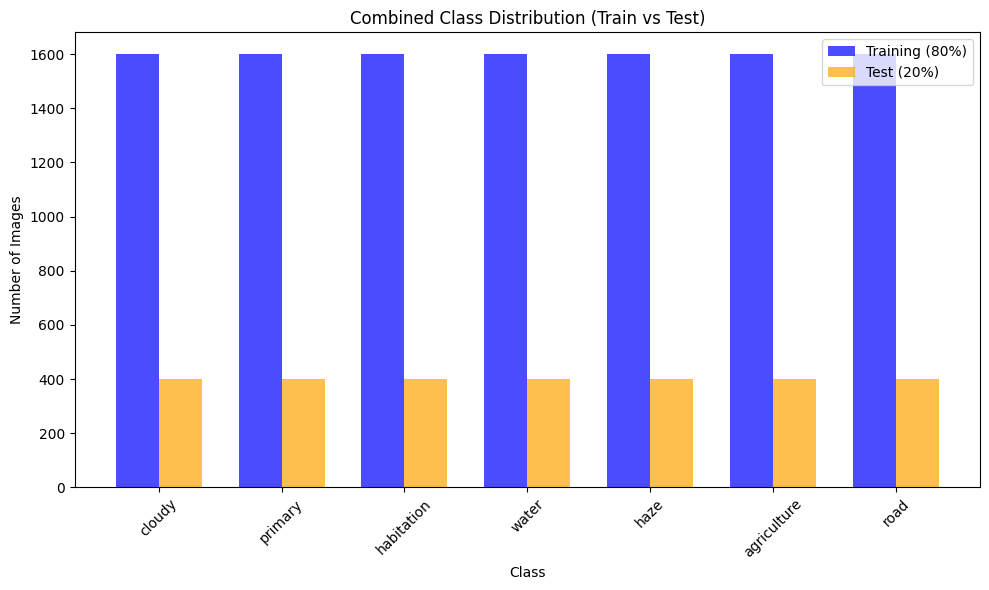

In [30]:
# Add stacked bar chart for combined class distribution
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(train_counts))

plt.bar(x, train_counts.values, bar_width, label='Training (80%)', color='blue', alpha=0.7)
plt.bar([i + bar_width for i in x], test_counts.values, bar_width, label='Test (20%)', color='orange', alpha=0.7)

plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Combined Class Distribution (Train vs Test)')
plt.xticks([i + bar_width/2 for i in x], train_counts.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'combined_class_distribution.png'), dpi=150)
plt.show()
plt.close()

--- Starting Visualization After Generator Creation ---
Visualizing a sample batch from train and test generators...
Class distribution:
 label
primary        18553
road            4972
water           4471
agriculture     4088
habitation      3531
haze            2697
cloudy          2089
Name: count, dtype: int64
Selected 14000 images: 2000 per class
Found 11200 validated image filenames belonging to 7 classes.
Found 2800 validated image filenames belonging to 7 classes.
Class names: ['agriculture', 'cloudy', 'habitation', 'haze', 'primary', 'road', 'water']
Found 11200 training images and 2800 test images.


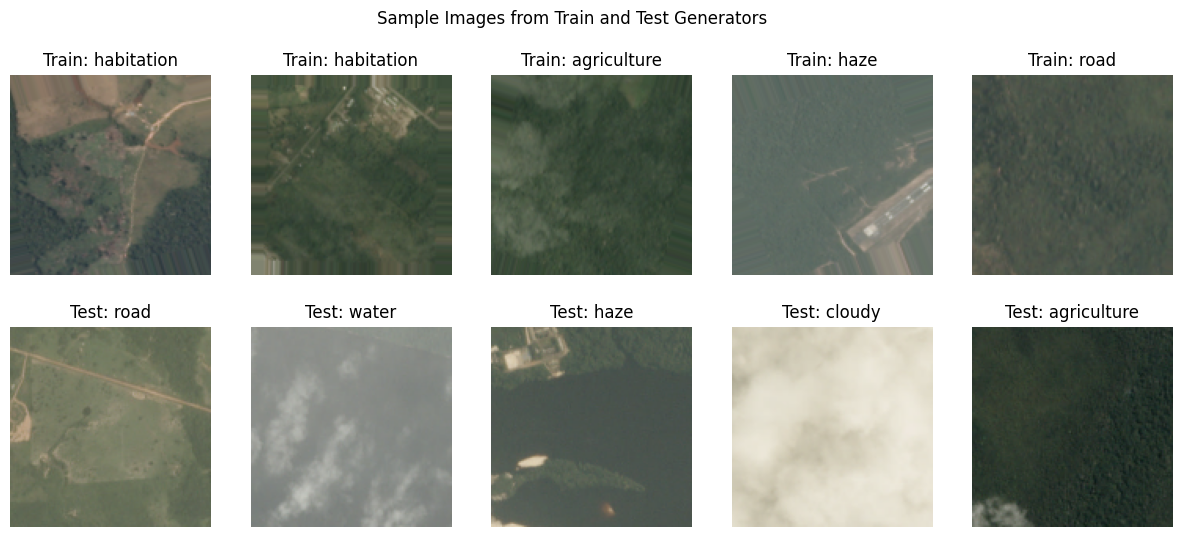

Sample batch from generators visualized and saved.
--- Visualization After Generator Creation Complete ---


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

print("--- Starting Visualization After Generator Creation ---")
print("Visualizing a sample batch from train and test generators...")

# Define output_dir
output_dir = '/content/project/results'
os.makedirs(output_dir, exist_ok=True)

# Recreate data and generators
csv_path = '/content/planets-dataset/planet/planet/train_classes.csv'
img_dir = '/content/planets-dataset/planet/planet/train-jpg'
if not os.path.exists(csv_path) or not os.path.exists(img_dir):
    print(f"Error: Dataset files not found at {csv_path} or {img_dir}. Please ensure dataset is downloaded.")
else:
    data = analyze_dataset(csv_path, output_dir)
    selected_data = select_subset(data, n_per_class=2000)
    # Ensure image_name includes .jpg if not already present
    selected_data['image_name'] = selected_data['image_name'].apply(lambda x: x if x.endswith('.jpg') else x + '.jpg')
    train_data, test_data = train_test_split(
        selected_data,
        test_size=0.2,
        stratify=selected_data['label'],
        random_state=42
    )
    train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=20, zoom_range=0.2, fill_mode='nearest')
    test_datagen = ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory=img_dir,
        x_col='image_name',
        y_col='label',
        target_size=(128, 128),
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=42
    )
    test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory=img_dir,
        x_col='image_name',
        y_col='label',
        target_size=(128, 128),
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )
    class_names = sorted(train_generator.class_indices.keys())
    print(f"Class names: {class_names}")
    print(f"Found {train_generator.samples} training images and {test_generator.samples} test images.")

# Get a batch from generators
try:
    train_batch = next(train_generator)
    test_batch = next(test_generator)
    images_train, labels_train = train_batch[0], train_batch[1]
    images_test, labels_test = test_batch[0], test_batch[1]
    if images_train.size == 0 or images_test.size == 0:
        raise ValueError("No images loaded in the batch. Check image filenames and directory.")
except Exception as e:
    print(f"Error getting batch: {e}. Ensure image filenames match files in {img_dir}.")
    raise

# Plot sample images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    if i < 5 and images_train.size > 0:
        ax.imshow(images_train[i])
        ax.set_title(f"Train: {class_names[np.argmax(labels_train[i])]}")
    elif images_test.size > 0:
        ax.imshow(images_test[i-5])
        ax.set_title(f"Test: {class_names[np.argmax(labels_test[i-5])]}")
    ax.axis('off')
plt.suptitle('Sample Images from Train and Test Generators')
plt.savefig(os.path.join(output_dir, 'sample_generator_images.png'), dpi=150)
plt.show()
plt.close()

print("Sample batch from generators visualized and saved.")
print("--- Visualization After Generator Creation Complete ---")

In [13]:
# cell 4
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

def build_cnn(img_size=128, num_classes=7):
    """
    Builds a CNN model from scratch with batch normalization and dropout.

    Args:
        img_size (int): Image size (height/width)
        num_classes (int): Number of classes

    Returns:
        model: Keras Sequential model
    """
    try:
        model = Sequential([
            Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_size, img_size, 3)),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation='relu', padding='same'),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Conv2D(128, (3, 3), activation='relu', padding='same'),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Conv2D(256, (3, 3), activation='relu', padding='same'),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(512, activation='relu'),
            BatchNormalization(),
            Dropout(0.4),
            Dense(256, activation='relu'),
            BatchNormalization(),
            Dropout(0.5),
            Dense(num_classes, activation='softmax')
        ])
        return model
    except Exception as e:
        print(f"Error building model: {e}")
        raise

In [14]:
# CELL 5 (CORRECTED - EarlyStopping Removed)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
import numpy as np

def train_model(model, train_generator, test_generator, epochs=45):
    """
    Trains the CNN model with only the ReduceLROnPlateau callback
    to ensure training runs for the full number of epochs.

    Args:
        model: Keras Sequential model
        train_generator: Training data generator
        test_generator: Test data generator
        epochs (int): Number of epochs

    Returns:
        tuple: (model, history)
    """
    try:
        # Set random seeds
        tf.random.set_seed(42)
        np.random.seed(42)

        # Compile model
        model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        # Callbacks (Only ReduceLROnPlateau is kept)
        callbacks = [
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=3,
                min_lr=1e-6,
                verbose=1
            )
        ]

        print("\n--- Starting Model Training (EarlyStopping Disabled) ---")
        # Train model (without the 'workers' and 'use_multiprocessing' arguments)
        history = model.fit(
            train_generator,
            epochs=epochs,
            validation_data=test_generator,
            callbacks=callbacks,
            verbose=1
        )

        return model, history
    except Exception as e:
        print(f"Training error: {e}")
        raise

In [15]:
# CELL 6 (REVISED) - EVALUATION
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os

def evaluate_model(model, test_generator, history, output_dir):
    """
    Evaluates the model and saves visualizations, including both raw
    and normalized confusion matrices.

    Args:
        model: Keras Sequential model
        test_generator: Test data generator
        history: Training history
        output_dir: Directory to save plots
    """
    try:
        # --- Make Predictions ---
        print("\n--- Starting Model Evaluation ---")
        test_generator.reset()
        predictions = model.predict(test_generator)
        pred_labels = np.argmax(predictions, axis=1)
        true_labels = test_generator.classes
        class_names = sorted(test_generator.class_indices.keys())
        print("Predictions generated successfully.")

        # --- Classification Report ---
        print("\nClassification Report:")
        print(classification_report(true_labels, pred_labels, target_names=class_names))

        # --- Generate and Save Plots ---
        os.makedirs(output_dir, exist_ok=True)

        # Plot 1: Raw Confusion Matrix
        cm_raw = confusion_matrix(true_labels, pred_labels)
        plt.figure(figsize=(12, 9))
        sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix (Raw Counts)')
        plt.savefig(os.path.join(output_dir, 'confusion_matrix_raw.png'), dpi=150)
        plt.show()
        print("Raw confusion matrix saved.")

        # Plot 2: Normalized Confusion Matrix
        cm_normalized = cm_raw.astype('float') / cm_raw.sum(axis=1)[:, np.newaxis]
        plt.figure(figsize=(12, 9))
        sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Normalized Confusion Matrix (Percentages)')
        plt.savefig(os.path.join(output_dir, 'confusion_matrix_normalized.png'), dpi=150)
        plt.show()
        print("Normalized confusion matrix saved.")

        # Plot 3: Training History
        plt.figure(figsize=(14, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Model Accuracy Over Time')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Model Loss Over Time')
        plt.legend()

        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, 'training_plots.png'), dpi=150)
        plt.show()
        print("Training history plots saved.")

    except Exception as e:
        print(f"An error occurred during evaluation: {e}")
        raise

    print("--- Model Evaluation Complete ---")

### ***Train Without saving model history***

Class distribution:
 label
primary        18553
road            4972
water           4471
agriculture     4088
habitation      3531
haze            2697
cloudy          2089
Name: count, dtype: int64
Selected 14000 images: 2000 per class
Training set: 11200 images, Test set: 2800 images
Found 11200 validated image filenames belonging to 7 classes.
Found 2800 validated image filenames belonging to 7 classes.
Class indices: {'agriculture': 0, 'cloudy': 1, 'habitation': 2, 'haze': 3, 'primary': 4, 'road': 5, 'water': 6}

--- Starting Model Training (EarlyStopping Disabled) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/45
350/350 ━━━━━━━━━━━━━━━━━━━━ 69s 172ms/step - accuracy: 0.3496 - loss: 2.0641 - val_accuracy: 0.2821 - val_loss: 2.4266 - learning_rate: 0.0010
Epoch 2/45
350/350 ━━━━━━━━━━━━━━━━━━━━ 60s 172ms/step - accuracy: 0.4107 - loss: 1.5469 - val_accuracy: 0.3593 - val_loss: 1.6003 - learning_rate: 0.0010
Epoch 3/45
350/350 ━━━━━━━━━━━━━━━━━━━━ 59s 169ms/step - accuracy: 0.4536 - loss: 1.3873 - val_accuracy: 0.3225 - val_loss: 1.5600 - learning_rate: 0.0010
Epoch 4/45
350/350 ━━━━━━━━━━━━━━━━━━━━ 59s 168ms/step - accuracy: 0.5055 - loss: 1.2821 - val_accuracy: 0.1950 - val_loss: 2.0097 - learning_rate: 0.0010
Epoch 5/45
350/350 ━━━━━━━━━━━━━━━━━━━━ 60s 173ms/step - accuracy: 0.5098 - loss: 1.2603 - val_accuracy: 0.4432 - val_loss: 1.3188 - learning_rate: 0.0010
Epoch 6/45
350/350 ━━━━━━━━━━━━━━━━━━━━ 59s 170ms/step - accuracy: 0.5275 - loss: 1.2184 - val_accuracy: 0.4536 - val_loss: 1.5809 - learning_rate: 0.0010
Epoch 7/45
350/350 ━━━━━━━━━━━━━━━━━━━━ 59s 170ms/step - accuracy: 0.5

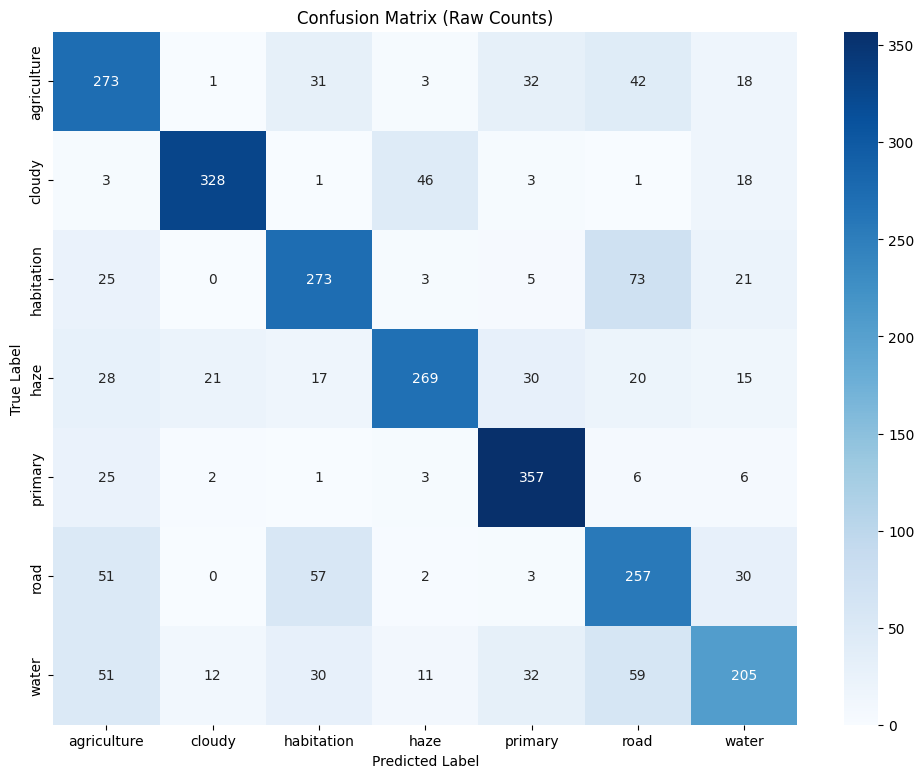

Raw confusion matrix saved.


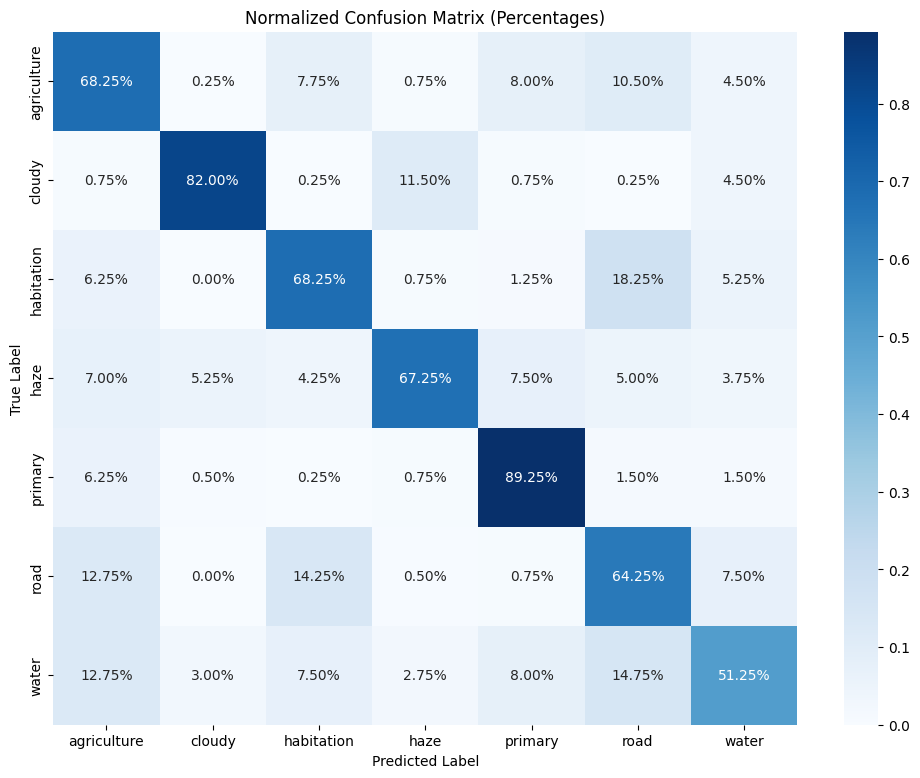

Normalized confusion matrix saved.


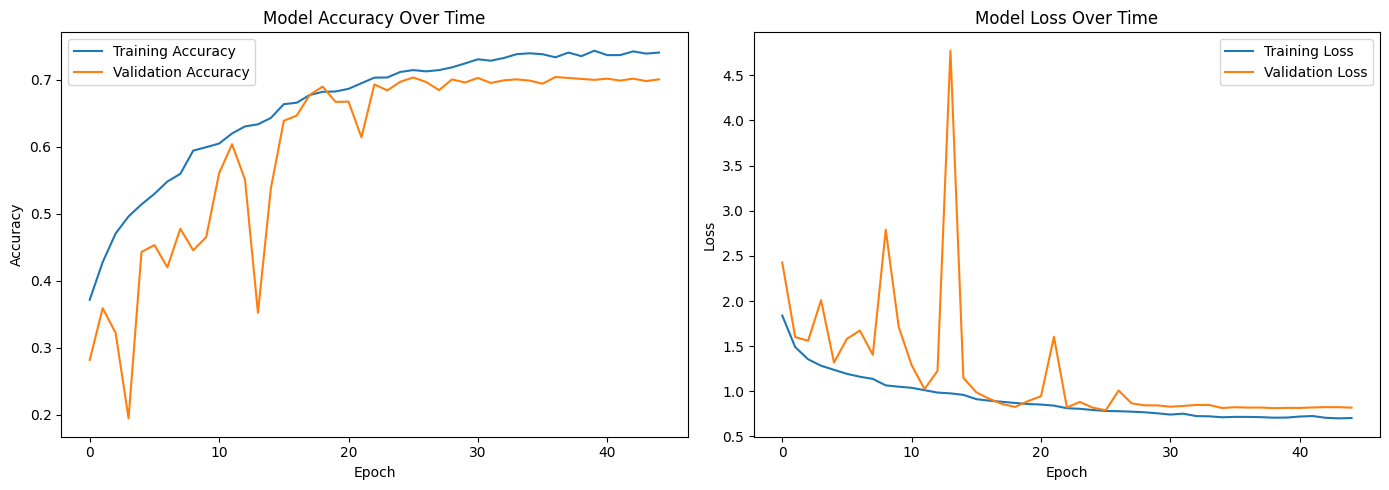

Training history plots saved.
--- Model Evaluation Complete ---
Model saved to /content/project/models/cnn_model.keras


In [ ]:
# # CELL 7
# import os
# import tensorflow as tf
# from sklearn.model_selection import train_test_split

# # Set random seeds for reproducibility
# tf.random.set_seed(42)

# # Setup directories
# base_dir = '/content/project'
# output_dir = os.path.join(base_dir, 'results')
# os.makedirs(output_dir, exist_ok=True)
# os.makedirs(os.path.join(base_dir, 'models'), exist_ok=True)

# # Paths
# csv_path = '/content/planets-dataset/planet/planet/train_classes.csv'
# img_dir = '/content/planets-dataset/planet/planet/train-jpg'

# # Verify paths
# if not os.path.exists(csv_path):
#     print(f"Error: {csv_path} not found. Upload train_classes.csv.")
#     raise FileNotFoundError
# if not os.path.exists(img_dir):
#     print(f"Error: {img_dir} not found. Upload train-jpg directory.")
#     raise FileNotFoundError

# # Analyze dataset
# data = analyze_dataset(csv_path, output_dir)

# # Select subset (14,000 images, 2,000 per class)
# selected_data = select_subset(data, n_per_class=2000)

# # Split data
# train_data, test_data = train_test_split(
#     selected_data,
#     test_size=0.2,
#     stratify=selected_data['label'],
#     random_state=42
# )
# print(f"Training set: {len(train_data)} images, Test set: {len(test_data)} images")

# # Create data generators
# train_generator, test_generator = create_generators(
#     train_data, test_data, img_dir, img_size=128, batch_size=32
# )

# # Build model
# model = build_cnn(img_size=128, num_classes=7)

# # Train model
# model, history = train_model(model, train_generator, test_generator, epochs=45)

# # Evaluate model
# evaluate_model(model, test_generator, history, output_dir)

# # Save model
# model_path = os.path.join(base_dir, 'models', 'cnn_model.keras')
# model.save(model_path)
# print(f"Model saved to {model_path}")

### ***Train with Saving***

Class distribution:
 label
primary        18553
road            4972
water           4471
agriculture     4088
habitation      3531
haze            2697
cloudy          2089
Name: count, dtype: int64
Selected 14000 images: 2000 per class
Training set: 11200 images, Test set: 2800 images
Found 11200 validated image filenames belonging to 7 classes.
Found 2800 validated image filenames belonging to 7 classes.
Class indices: {'agriculture': 0, 'cloudy': 1, 'habitation': 2, 'haze': 3, 'primary': 4, 'road': 5, 'water': 6}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Starting Model Training (EarlyStopping Disabled) ---


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/45
350/350 ━━━━━━━━━━━━━━━━━━━━ 79s 191ms/step - accuracy: 0.3511 - loss: 2.0513 - val_accuracy: 0.2607 - val_loss: 2.1368 - learning_rate: 0.0010
Epoch 2/45
350/350 ━━━━━━━━━━━━━━━━━━━━ 62s 178ms/step - accuracy: 0.4297 - loss: 1.4978 - val_accuracy: 0.4296 - val_loss: 1.4548 - learning_rate: 0.0010
Epoch 3/45
350/350 ━━━━━━━━━━━━━━━━━━━━ 62s 176ms/step - accuracy: 0.4585 - loss: 1.3792 - val_accuracy: 0.4104 - val_loss: 1.4118 - learning_rate: 0.0010
Epoch 4/45
350/350 ━━━━━━━━━━━━━━━━━━━━ 62s 176ms/step - accuracy: 0.4942 - loss: 1.3054 - val_accuracy: 0.4082 - val_loss: 1.5078 - learning_rate: 0.0010
Epoch 5/45
350/350 ━━━━━━━━━━━━━━━━━━━━ 84s 181ms/step - accuracy: 0.4987 - loss: 1.2639 - val_accuracy: 0.4611 - val_loss: 1.2634 - learning_rate: 0.0010
Epoch 6/45
350/350 ━━━━━━━━━━━━━━━━━━━━ 61s 175ms/step - accuracy: 0.5270 - loss: 1.2177 - val_accuracy: 0.3729 - val_loss: 1.7484 - learning_rate: 0.0010
Epoch 7/45
350/350 ━━━━━━━━━━━━━━━━━━━━ 62s 177ms/step - accuracy: 0.5

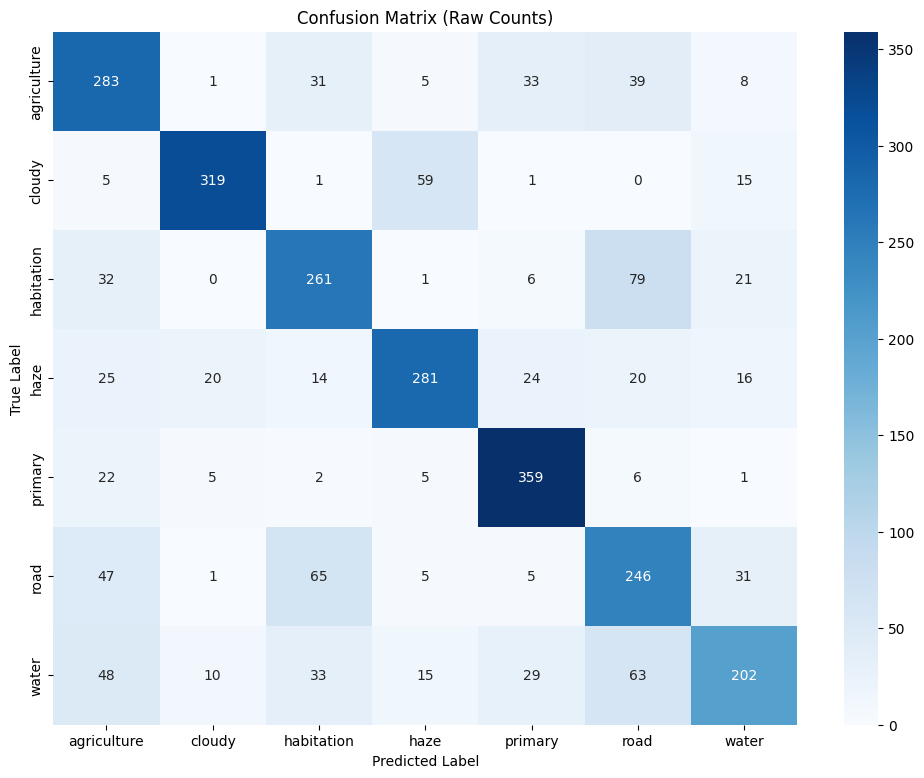

Raw confusion matrix saved.


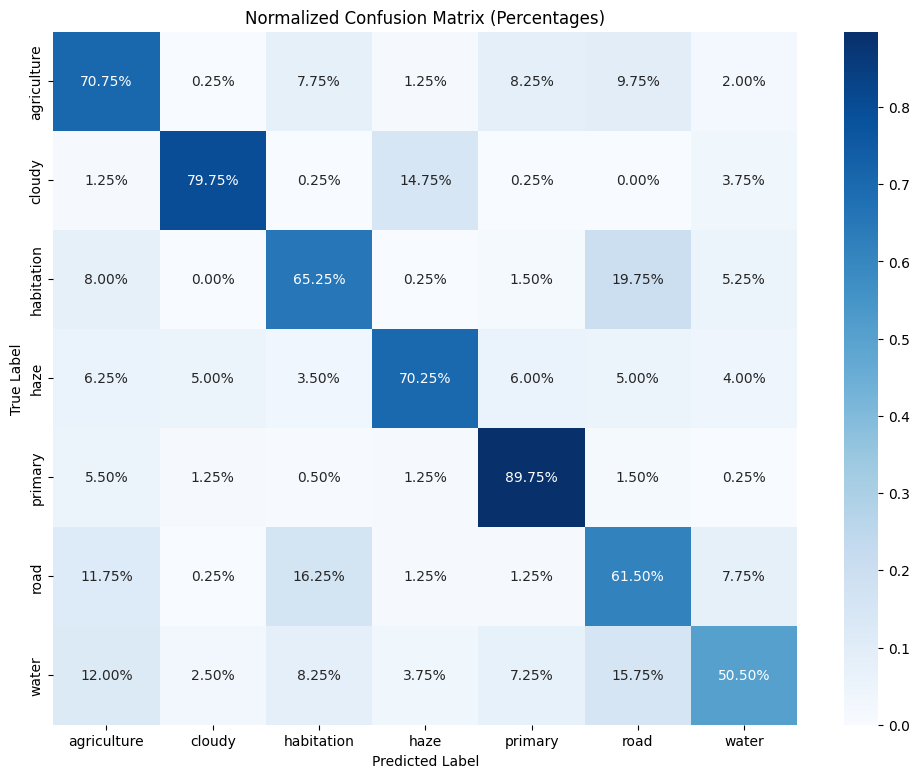

Normalized confusion matrix saved.


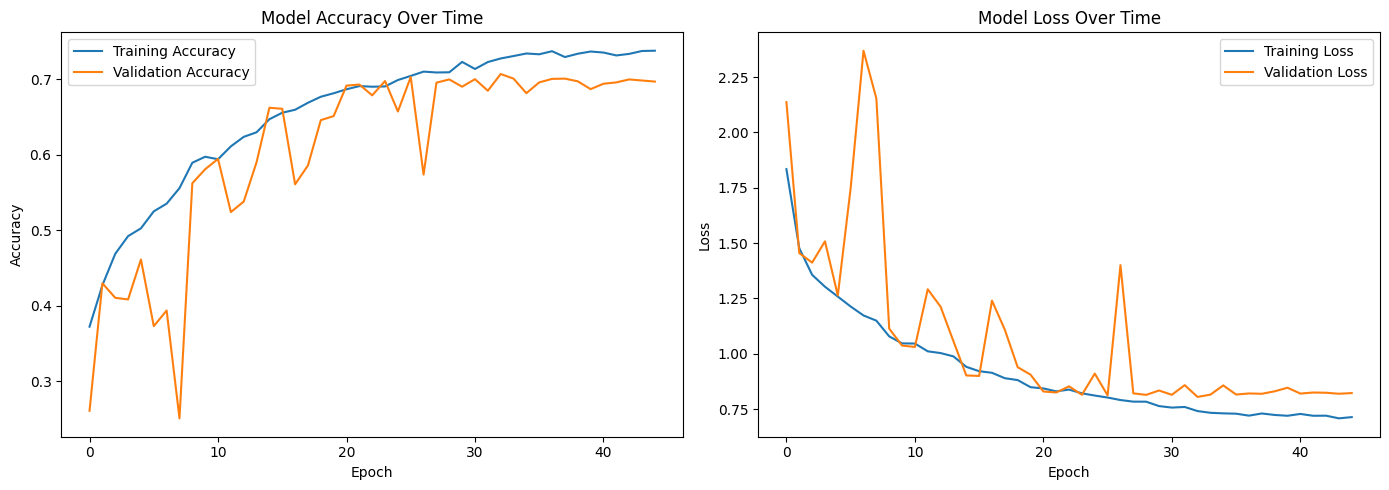

Training history plots saved.
--- Model Evaluation Complete ---
Model saved to /content/project/models/cnn_model.keras
Training history saved to /content/project/results/training_history.npy


In [16]:
# cell 7
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Set random seeds for reproducibility
tf.random.set_seed(42)

# Setup directories
base_dir = '/content/project'
output_dir = os.path.join(base_dir, 'results')
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(base_dir, 'models'), exist_ok=True)

# Paths
csv_path = '/content/planets-dataset/planet/planet/train_classes.csv'
img_dir = '/content/planets-dataset/planet/planet/train-jpg'

# Verify paths
if not os.path.exists(csv_path):
    print(f"Error: {csv_path} not found. Upload train_classes.csv.")
    raise FileNotFoundError
if not os.path.exists(img_dir):
    print(f"Error: {img_dir} not found. Upload train-jpg directory.")
    raise FileNotFoundError

# Analyze dataset
data = analyze_dataset(csv_path, output_dir)

# Select subset (14,000 images, 2,000 per class)
selected_data = select_subset(data, n_per_class=2000)

# Split data
train_data, test_data = train_test_split(
    selected_data,
    test_size=0.2,
    stratify=selected_data['label'],
    random_state=42
)
print(f"Training set: {len(train_data)} images, Test set: {len(test_data)} images")

# Create data generators
train_generator, test_generator = create_generators(
    train_data, test_data, img_dir, img_size=128, batch_size=32
)

# Build model
model = build_cnn(img_size=128, num_classes=7)

# Train model
model, history = train_model(model, train_generator, test_generator, epochs=45)

# Evaluate model
evaluate_model(model, test_generator, history, output_dir)

# Save model
model_path = os.path.join(base_dir, 'models', 'cnn_model.keras')
model.save(model_path)
print(f"Model saved to {model_path}")

# Save training history
history_path = os.path.join(base_dir, 'results', 'training_history.npy')
np.save(history_path, history.history)
print(f"Training history saved to {history_path}")

In [17]:
# check the trained model directory & History
import os
print(os.listdir('/content/project/models'))
print(os.listdir('/content/project/results'))

['cnn_model.keras']
['confusion_matrix_raw.png', 'class_distribution_simplified.png', 'confusion_matrix_normalized.png', 'training_plots.png', 'class_distribution_subset.png', 'class_distribution_split.png', 'training_history.npy', 'dataset_analysis.png']


--- Starting Inference Step ---
Loading model from: /content/project/models/cnn_model.keras
Model loaded successfully.
Class mapping for prediction created.

Selected 7 random images from the test set for inference.

Processing image: train_28343.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


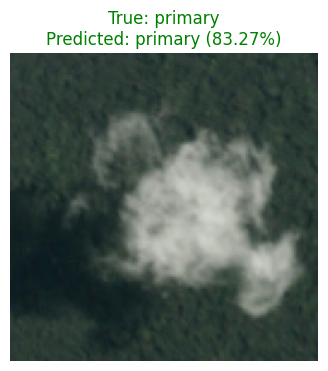


Processing image: train_28733.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


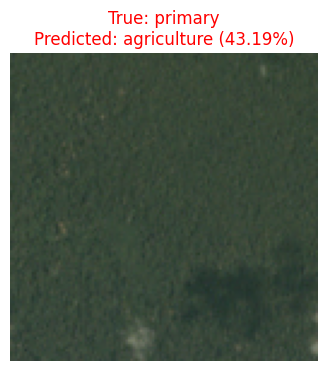


Processing image: train_25303.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


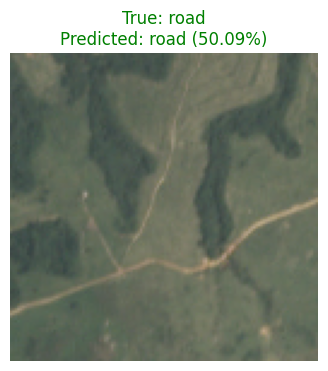


Processing image: train_33247.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


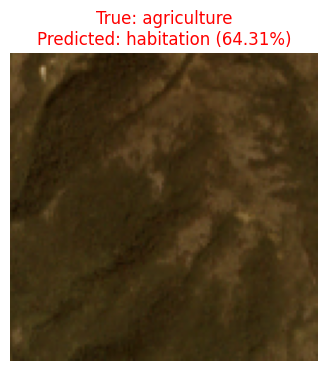


Processing image: train_36714.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


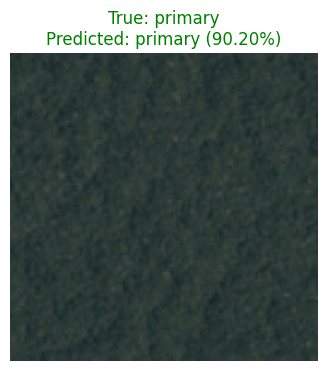


Processing image: train_25958.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


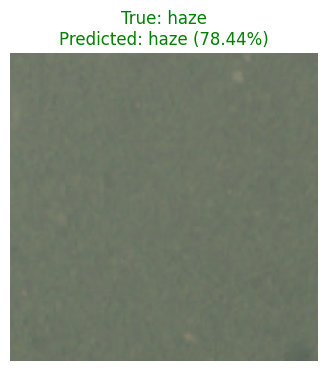


Processing image: train_34758.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


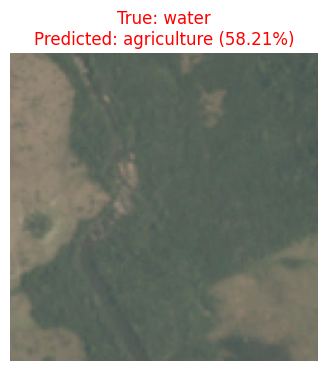


Processing image: train_28343.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


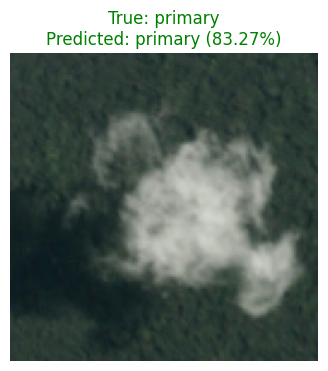


Processing image: train_28733.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


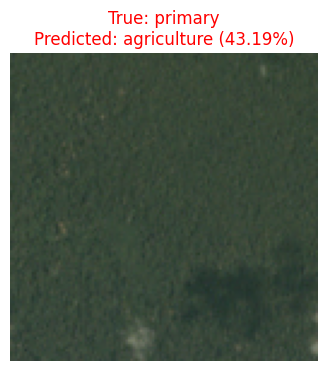


Processing image: train_25303.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


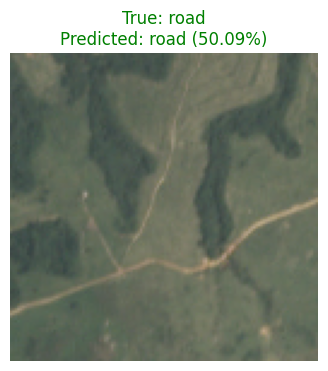


Processing image: train_33247.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


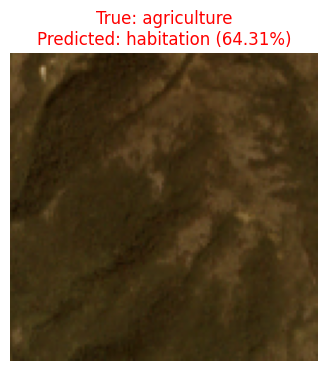


Processing image: train_36714.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


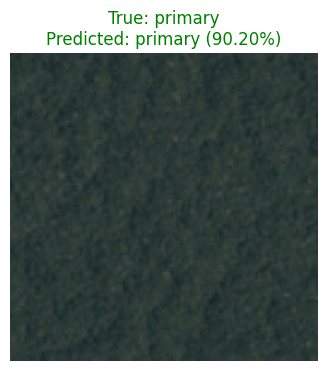


Processing image: train_25958.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


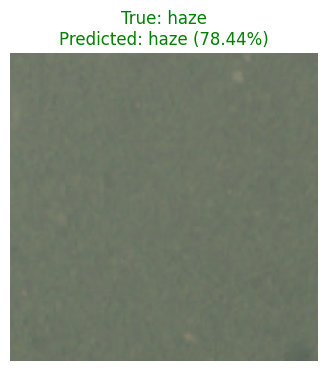


Processing image: train_34758.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


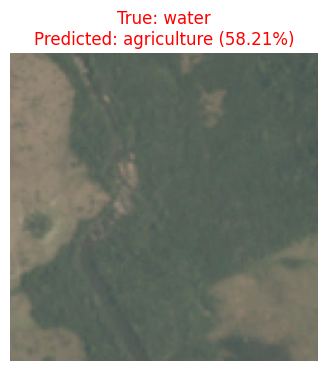

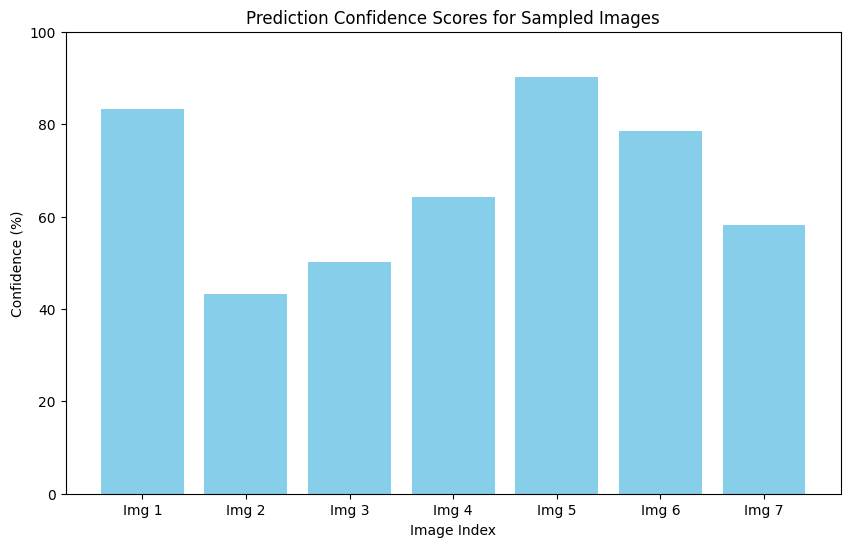

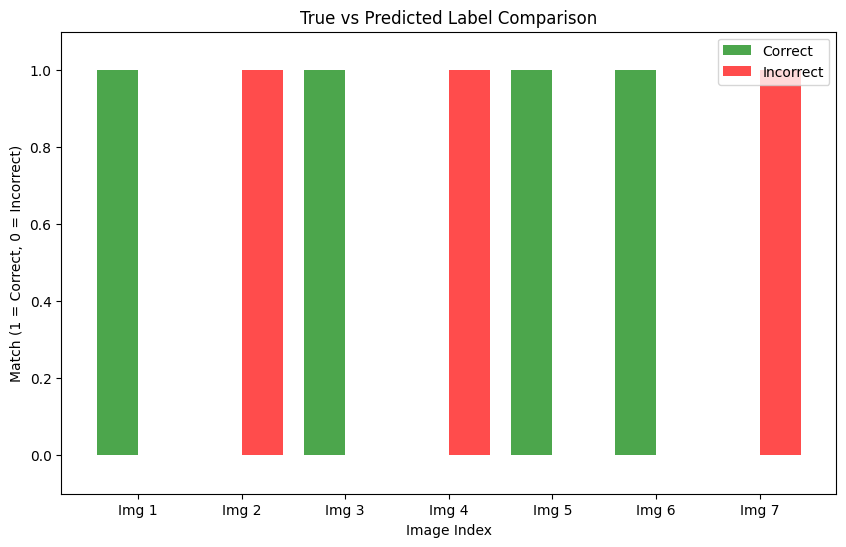


--- Inference Step Complete ---


In [33]:
# CELL 8 - INFERENCE
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print("--- Starting Inference Step ---")

# --- 1. Load the trained model ---
model_path = os.path.join(base_dir, 'models', 'cnn_model.keras')
print(f"Loading model from: {model_path}")
try:
    model = tf.keras.models.load_model(model_path)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")
    # Stop execution if model can't be loaded
    raise

# --- 2. Prepare for prediction ---
# Create a reverse mapping from class index to class name
# E.g., from { 'agriculture': 0, 'cloudy': 1 } to { 0: 'agriculture', 1: 'cloudy' }
class_indices = test_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}
print("Class mapping for prediction created.")

# --- 3. Select random samples from the test set ---
num_samples = 7
sample_images_df = test_data.sample(n=num_samples, random_state=50) # Use a different random state for new images
print(f"\nSelected {num_samples} random images from the test set for inference.")

# --- 4. Loop through samples and predict ---
for index, row in sample_images_df.iterrows():
    image_name = row['image_name']
    true_label = row['label']
    image_path = os.path.join(img_dir, image_name)

    print(f"\nProcessing image: {image_name}")

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array_rescaled = img_array / 255.0
    img_batch = np.expand_dims(img_array_rescaled, axis=0) # Create a batch of 1

    # Make prediction
    prediction = model.predict(img_batch)
    predicted_index = np.argmax(prediction, axis=1)[0]
    predicted_class = index_to_class[predicted_index]
    confidence = np.max(prediction) * 100

    # Display results
    plt.figure(figsize=(6, 4))
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPredicted: {predicted_class} ({confidence:.2f}%)",
              color=("green" if true_label == predicted_class else "red"))
    plt.axis('off')
    plt.show()
# Store results for visualization
true_labels = []
predicted_labels = []
confidences = []

# --- 4. Loop through samples and predict ---
for index, row in sample_images_df.iterrows():
    image_name = row['image_name']
    true_label = row['label']
    image_path = os.path.join(img_dir, image_name)

    print(f"\nProcessing image: {image_name}")

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array_rescaled = img_array / 255.0
    img_batch = np.expand_dims(img_array_rescaled, axis=0) # Create a batch of 1

    # Make prediction
    prediction = model.predict(img_batch)
    predicted_index = np.argmax(prediction, axis=1)[0]
    predicted_class = index_to_class[predicted_index]
    confidence = np.max(prediction) * 100

    # Store results
    true_labels.append(true_label)
    predicted_labels.append(predicted_class)
    confidences.append(confidence)

    # Display results
    plt.figure(figsize=(6, 4))
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPredicted: {predicted_class} ({confidence:.2f}%)",
              color=("green" if true_label == predicted_class else "red"))
    plt.axis('off')
    plt.show()

# --- 5. Visualization of Prediction Results ---

# Bar chart of confidence scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(confidences)), confidences, color='skyblue')
plt.xlabel('Image Index')
plt.ylabel('Confidence (%)')
plt.title('Prediction Confidence Scores for Sampled Images')
plt.xticks(range(len(confidences)), [f"Img {i+1}" for i in range(len(confidences))])
plt.ylim(0, 100)
plt.savefig(os.path.join(output_dir, 'prediction_confidence_scores.png'), dpi=150)
plt.show()
plt.close()

# Comparison of True vs Predicted Labels
plt.figure(figsize=(10, 6))
x = range(len(true_labels))
plt.bar(x, [1 if t == p else 0 for t, p in zip(true_labels, predicted_labels)], width=0.4, label='Correct', color='green', alpha=0.7)
plt.bar([i + 0.4 for i in x], [0 if t == p else 1 for t, p in zip(true_labels, predicted_labels)], width=0.4, label='Incorrect', color='red', alpha=0.7)
plt.xlabel('Image Index')
plt.ylabel('Match (1 = Correct, 0 = Incorrect)')
plt.title('True vs Predicted Label Comparison')
plt.xticks([i + 0.2 for i in x], [f"Img {i+1}" for i in range(len(true_labels))])
plt.legend()
plt.ylim(-0.1, 1.1)
plt.savefig(os.path.join(output_dir, 'true_vs_predicted_comparison.png'), dpi=150)
plt.show()
plt.close()

print("\n--- Inference Step Complete ---")